1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

7. Come up with some initial hypotheses based on your goal of predicting property value.

8. Visualize all combinations of variables in some way.

9. Run the appropriate statistical tests where needed.

10. What independent variables are correlated with the dependent variable, home value?

11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

13. Explore your dataset with any other visualizations you think will be helpful.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

In [2]:
from wrangle import wrangle_zillow, split_zillow
df_zillow = wrangle_zillow()

In [4]:
df = df_zillow.copy()

In [5]:
train, validate, test = split_zillow(df)

In [6]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
176880,3,2.0,1714,115157,1973,1282.32,6059
331975,3,3.0,1862,345618,1958,5530.82,6059
1753349,5,5.0,3959,1451000,1953,15884.95,6037
120218,3,3.0,2100,459187,1962,5619.06,6037
1991743,4,2.0,1954,403193,1980,5047.67,6037


### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [7]:
train.sample(100)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1026677,3,3.0,1840,234920,1929,2773.58,6059
1850634,3,3.0,2835,1116775,1988,12990.85,6037
994815,3,2.0,1160,477000,1957,5893.48,6037
258575,3,1.0,1162,272036,1947,3466.38,6037
135489,3,3.0,3184,505254,1984,5060.70,6059
...,...,...,...,...,...,...,...
1783377,3,1.0,930,305416,1958,4000.96,6037
1969068,3,2.0,1054,191341,1958,2684.24,6111
1934780,3,2.0,1244,461551,1954,12016.68,6059
372349,4,2.0,1711,466000,1951,6174.55,6037


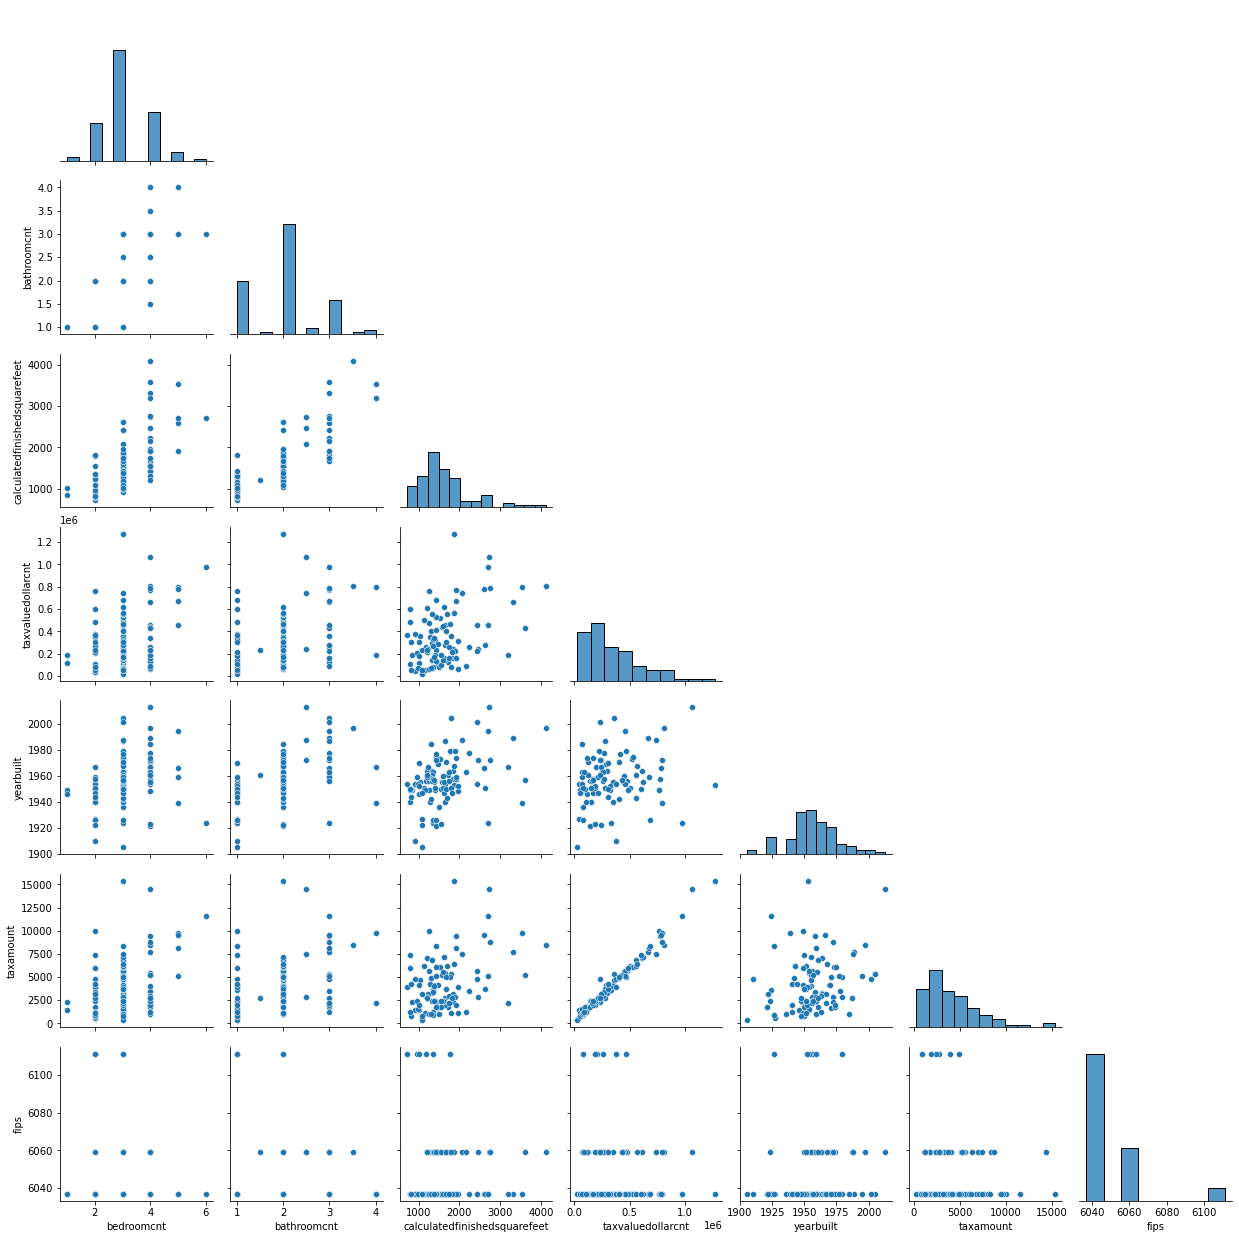

In [8]:
sns.pairplot(train.sample(100), corner=True)

In [13]:
def plot_variable_pairs(df):
    return sns.pairplot(df, corner=True)

### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [16]:
categorical_vars = ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'fips']
continuous_vars = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']

<AxesSubplot:xlabel='bedroomcnt', ylabel='count'>

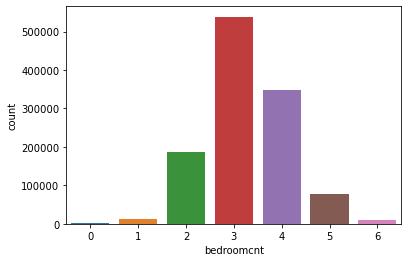

In [27]:
sns.countplot(data = train, x ='bedroomcnt')

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

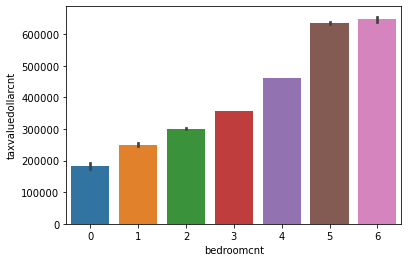

In [31]:
sns.barplot(data = train, x ='bedroomcnt', y = 'taxvaluedollarcnt')

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

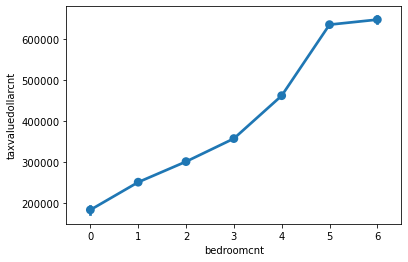

In [32]:
sns.pointplot(data = train, x ='bedroomcnt', y = 'taxvaluedollarcnt')

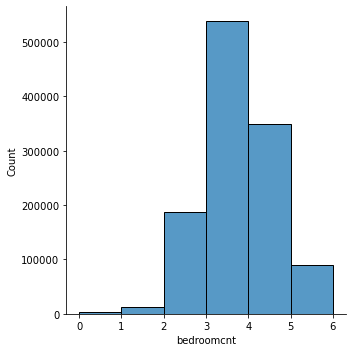

In [44]:
sns.displot(x='bedroomcnt', data=train, bins = 6)